### The Problem I try to investigate is that, is the global temperature really increasing? The data set I will use is the global temperature one, which records global average temperature from 1750 to current.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.offline as py
py.init_notebook_mode(connected=True)
%matplotlib inline

In [3]:
global_temp = pd.read_csv('GlobalTemperatures.csv')
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
global_temp_dt = global_temp[['dt','LandAverageTemperature','LandAverageTemperatureUncertainty']]
global_temp_dt = global_temp_dt[global_temp_dt.LandAverageTemperature.notnull()]
global_temp_dt = global_temp_dt.reset_index(drop=True)
global_temp_dt['LandUncerMax'] = pd.Series(global_temp_dt.LandAverageTemperature+global_temp_dt.LandAverageTemperatureUncertainty, index=global_temp_dt.index)
global_temp_dt['LandUncerMin'] = pd.Series(global_temp_dt.LandAverageTemperature-global_temp_dt.LandAverageTemperatureUncertainty, index=global_temp_dt.index)
global_temp_dt = global_temp_dt.drop('LandAverageTemperatureUncertainty', 1)
global_temp_dt.head()

,dt,LandAverageTemperature,LandUncerMax,LandUncerMin
0,1750-01-01,3.034,6.608,-0.540
1,1750-02-01,3.083,6.785,-0.619
2,1750-03-01,5.626,8.702,2.550
3,1750-04-01,8.490,10.941,6.039
4,1750-05-01,11.573,13.645,9.501


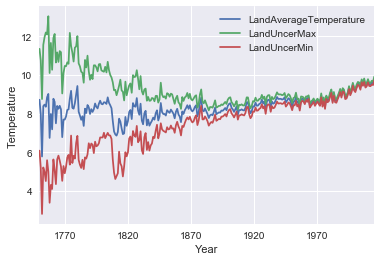

In [5]:
global_temp_dt = global_temp_dt.set_index(['dt'])
global_temp_dt.index = pd.to_datetime(global_temp_dt.index)
global_temp_dt_year = global_temp_dt.resample("A").mean()
ax = global_temp_dt_year.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Temperature")

### The plot shows the average temperature, with uncertainty range of temperature from 1750 to current. We can see the data of the first 100 years has a large variance. This may because of the inaccuracy of old facilities. And the data looks jaggy, so smooth it would be easier to see the trend.

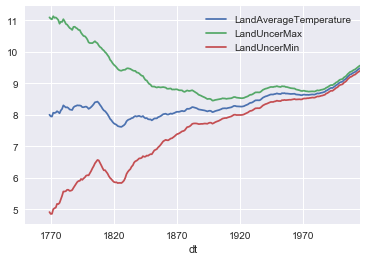

In [6]:
roll_dt = global_temp_dt_year.rolling(window=20).mean()
roll_dt.plot()

### I choose a rolling average window with 20 years as size to smooth the graph. In this way, it's hard to say the trend of global temperature is increasing at all.

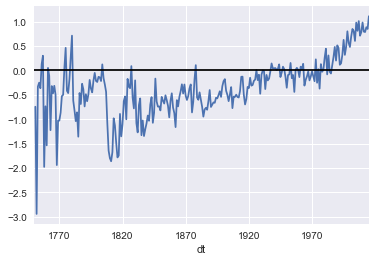

In [8]:
global_temp_dt_decade = global_temp_dt.resample("A").mean()
global_temp_dt_decade['diff'] = global_temp_dt_decade.LandAverageTemperature.diff(1)
global_temp_dt_decade['diff'].cumsum().plot()
plt.axhline(0, color='k')

### The plot above is the difference of each year, with respect to the temperature of 1750, and it's more obious to show the trend. From the graph, it's hard to say the global average temperature is increasing before 1970. But there is a straight up curve after 1970, and that can be considered a case of increment of temperature.

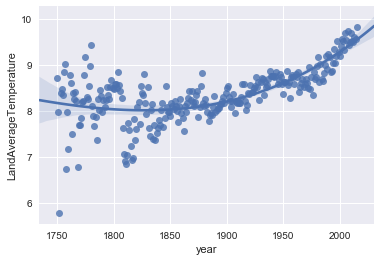

In [9]:
g = global_temp[['dt','LandAverageTemperature','LandAverageTemperatureUncertainty']]
g = g[g.LandAverageTemperature.notnull()]
g = g.reset_index(drop=True)
g = g.drop('LandAverageTemperatureUncertainty', 1)
g = g.set_index(['dt'])
g.index = pd.to_datetime(g.index)
g_year = g.resample("A").mean()
g_year['year'] = pd.Series(list(range(1750,2016)),index = g_year.index)
sns.regplot(y="LandAverageTemperature", x='year', data=g_year, order = 3, fit_reg=True)

### Let's try to plot a scatter plot and fit and linear regression model on it. I fit a linear regression model with order 3 on it, and this plot is easy to figure out that the trend is increasing, especailly after 1960.